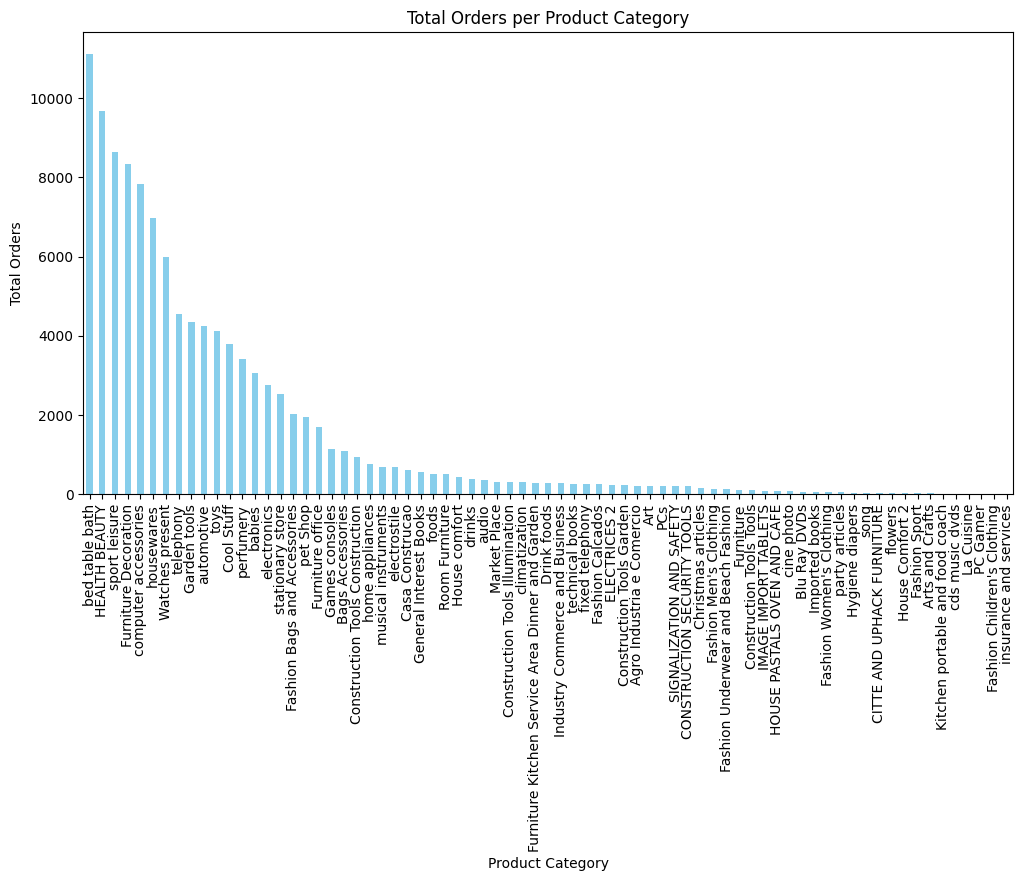

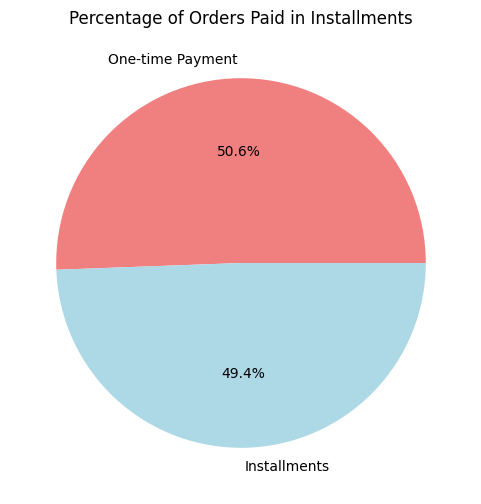

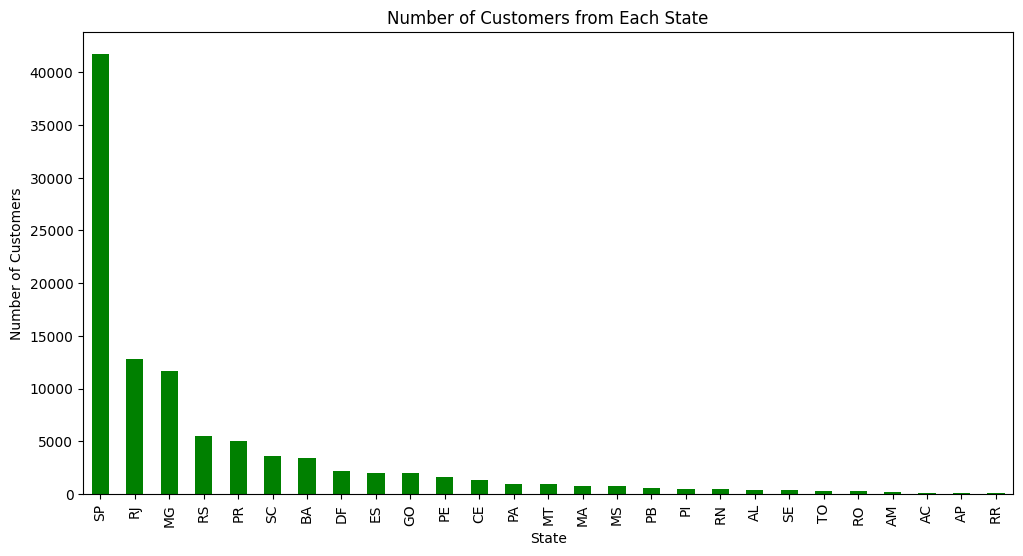

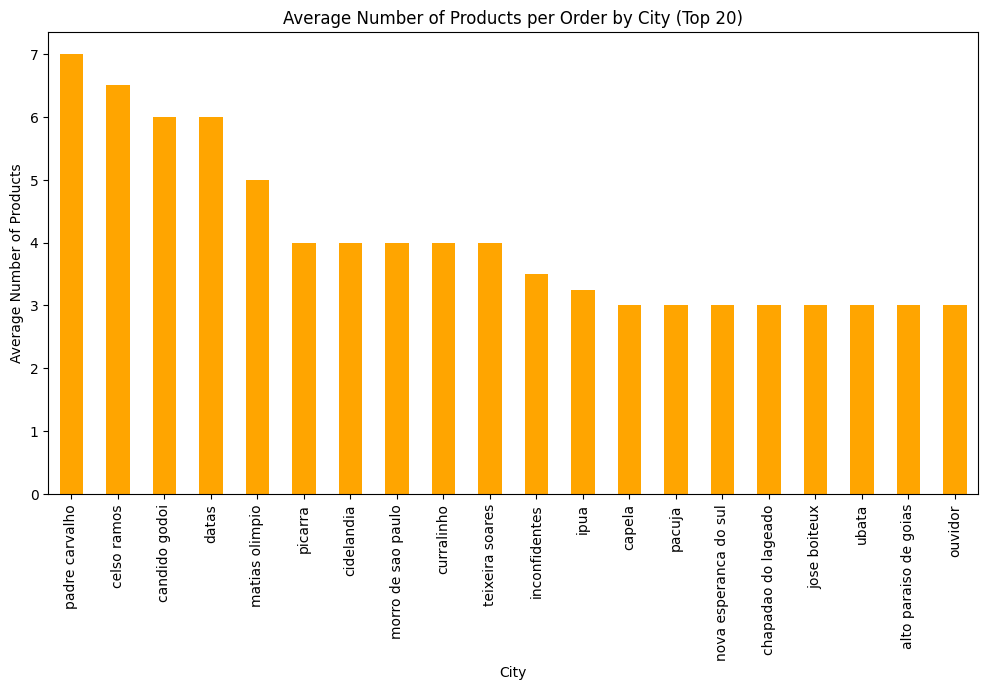

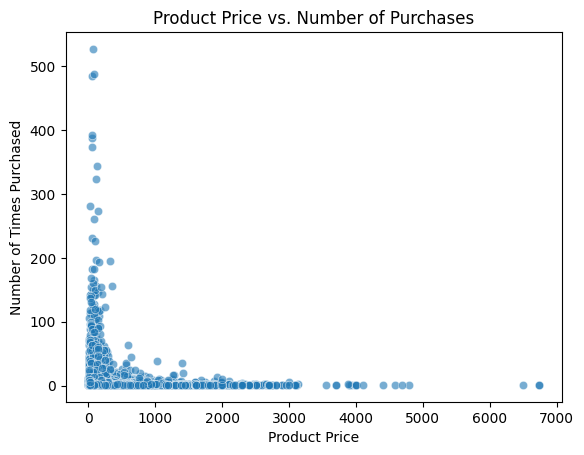

                             seller_id  total_revenue
857   4869f7a5dfa277a7dca6462dcf3b52b2      229472.63
1013  53243585a1d6dc2643021fd1853d8905      222776.05
881   4a3ca9315b744ce9f8e9374361493884      200472.92
3024  fa1c13f2614d7b5c4749cbc52fecda94      194042.03
1535  7c67e1448b00f6e969d365cea6b010ab      187923.89
1560  7e93a43ef30c4f03f38b393420bc753a      176431.87
2643  da8622b14eb17ae2831f4ac5b9dab84a      160236.57
1505  7a67c85e85bb2ce8582c35f2203ad736      141745.53
192   1025f0e2d44d7041d6cf58b6550e0bfa      138968.55
1824  955fee9216a65b617aa5c0531780ce60      135171.70
                               order_id                       customer_id  \
68055  5f79b5b0931d63f1a42989eb65b9da6e  00012a2ce6f8dcda20d059ce98491703   
9936   a44895d095d7e0702b6a162fa2dbeced  000161a058600d5901f007fab4c27140   
65380  316a104623542e4d75189bb372bc5f8d  0001fd6190edaaf884bcaf3d49edf079   
42834  5825ce2e88d5346438686b0bba99e5ee  0002414f95344307404f0ace7a26f1d5   
5843   0ab7fb08086d4a

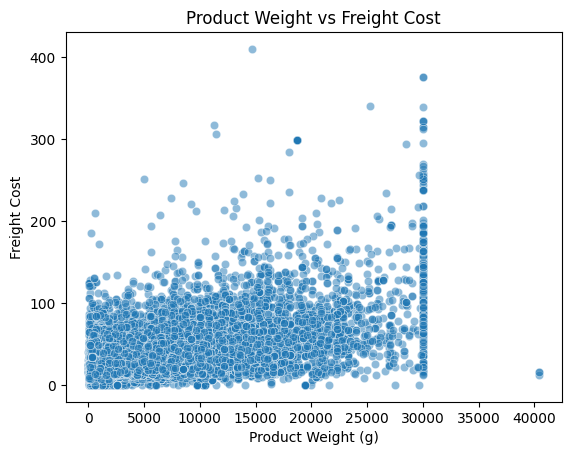

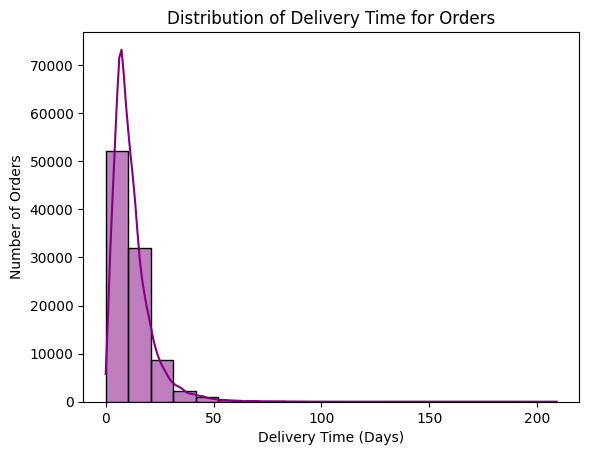

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load datasets
customers = pd.read_csv("customers.csv")
geolocation = pd.read_csv("geolocation.csv")
order_items = pd.read_csv("/content/order_items.csv")
orders = pd.read_csv("orders (1).csv")
payments = pd.read_csv("payments.csv")
products = pd.read_csv("products.csv")
sellers = pd.read_csv("sellers.csv")

# Question 1: Total orders per product category (visualize)
order_items_products = order_items.merge(products, on="product_id")
categories_count = order_items_products["product category"].value_counts()
plt.figure(figsize=(12, 6))
categories_count.plot(kind='bar', color='skyblue')
plt.title("Total Orders per Product Category")
plt.xlabel("Product Category")
plt.ylabel("Total Orders")
plt.xticks(rotation=90)
plt.show()

# Question 2: Percentage of orders paid in installments (visualize)
installment_orders = payments[payments["payment_installments"] > 1]
installment_percentage = (len(installment_orders) / len(payments)) * 100
labels = ["One-time Payment", "Installments"]
sizes = [100 - installment_percentage, installment_percentage]
plt.figure(figsize=(6, 6))
plt.pie(sizes, labels=labels, autopct='%1.1f%%', colors=['lightcoral', 'lightblue'])
plt.title("Percentage of Orders Paid in Installments")
plt.show()

# Question 3: Number of customers from each state (visualize)
customers_state_count = customers["customer_state"].value_counts()
plt.figure(figsize=(12, 6))
customers_state_count.plot(kind='bar', color='green')
plt.title("Number of Customers from Each State")
plt.xlabel("State")
plt.ylabel("Number of Customers")
plt.xticks(rotation=90)
plt.show()

# Question 4: Average number of products per order by customer city (visualize)
orders_customers = orders.merge(customers, on="customer_id")
orders_items_count = order_items.groupby("order_id")["order_item_id"].count().reset_index()
avg_products_city = orders_customers.merge(orders_items_count, on="order_id").groupby("customer_city")["order_item_id"].mean().sort_values(ascending=False)
plt.figure(figsize=(12, 6))
avg_products_city[:20].plot(kind='bar', color='orange')
plt.title("Average Number of Products per Order by City (Top 20)")
plt.xlabel("City")
plt.ylabel("Average Number of Products")
plt.xticks(rotation=90)
plt.show()

# Question 5: Relationship between product price and number of purchases
product_sales = order_items.groupby("product_id").agg({"order_id": "count", "price": "mean"}).reset_index()
sns.scatterplot(x=product_sales["price"], y=product_sales["order_id"], alpha=0.6)
plt.xlabel("Product Price")
plt.ylabel("Number of Times Purchased")
plt.title("Product Price vs. Number of Purchases")
plt.show()

# Question 6: Total revenue per seller and ranking
seller_revenue = order_items.groupby("seller_id")["price"].sum().reset_index().sort_values(by="price", ascending=False)
seller_revenue.columns = ["seller_id", "total_revenue"]
print(seller_revenue.head(10))  # Top 10 sellers by revenue

# Question 7: Moving average of order values per customer
order_values = order_items.groupby("order_id")["price"].sum().reset_index()
customer_orders = orders.merge(order_values, on="order_id").sort_values(by=["customer_id", "order_purchase_timestamp"])
customer_orders["moving_avg"] = customer_orders.groupby("customer_id")["price"].transform(lambda x: x.rolling(window=3).mean())
print(customer_orders.head(10))

# Question 8: Customer retention rate
orders["order_purchase_timestamp"] = pd.to_datetime(orders["order_purchase_timestamp"])
first_order = orders.groupby("customer_id")["order_purchase_timestamp"].min().reset_index()
reorders = orders.merge(first_order, on="customer_id")
reorders = reorders[(reorders["order_purchase_timestamp_x"] >= reorders["order_purchase_timestamp_y"]) & (reorders["order_purchase_timestamp_x"] <= reorders["order_purchase_timestamp_y"] + pd.DateOffset(months=6))]
retention_rate = (reorders["customer_id"].nunique() / first_order["customer_id"].nunique()) * 100
print(f"Customer Retention Rate: {retention_rate:.2f}%")

# Question 9: Relationship between product weight, dimensions, and freight costs
order_items_products = order_items.merge(products, on="product_id")
sns.scatterplot(x=order_items_products["product_weight_g"], y=order_items_products["freight_value"], alpha=0.5)
plt.xlabel("Product Weight (g)")
plt.ylabel("Freight Cost")
plt.title("Product Weight vs Freight Cost")
plt.show()

# Question 10: Does order delivery time affect product ordering?
orders["delivery_time_days"] = (pd.to_datetime(orders["order_delivered_customer_date"]) - pd.to_datetime(orders["order_purchase_timestamp"])).dt.days
sns.histplot(orders["delivery_time_days"], bins=20, kde=True, color='purple')
plt.xlabel("Delivery Time (Days)")
plt.ylabel("Number of Orders")
plt.title("Distribution of Delivery Time for Orders")
plt.show()